In [2]:
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pylab as plt
sns.set(style='whitegrid', rc={'figure.figsize':(10,5)})

In [5]:
import numpy as np

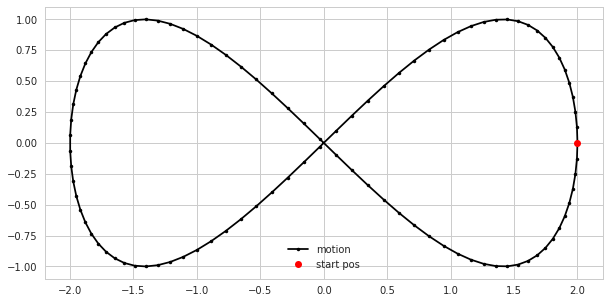

In [46]:
t = np.linspace(0, 2*np.pi, 100)

# position
x = 2 * np.cos(t)
y = np.sin(2*t)

plt.plot(x, y, 'k.-', label ='motion')
plt.plot(x[0], y[0], 'ro', label='start pos')
plt.legend()

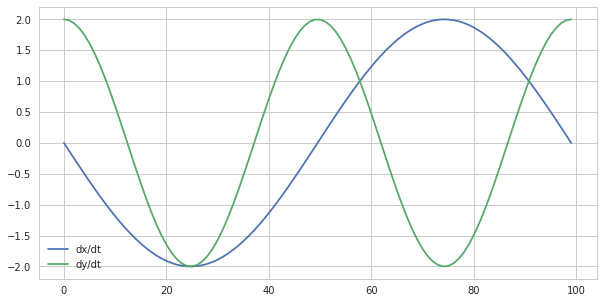

In [50]:
# velocity
dxdt = -2 * np.sin(t)
dydt = 2 * np.cos(2 * t)

plt.plot(dxdt, label='dx/dt')
plt.plot(dydt, label='dy/dt')
plt.legend()

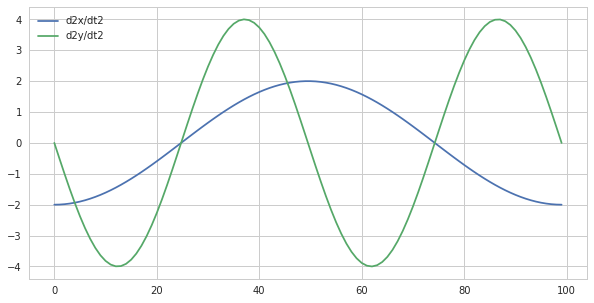

In [52]:
# acceleration
d2xdt2 = -2 * np.cos(t)
d2ydt2 = -4 * np.sin(2 * t)

plt.plot(d2xdt2, label='d2x/dt2')
plt.plot(d2ydt2, label='d2y/dt2')
plt.legend()

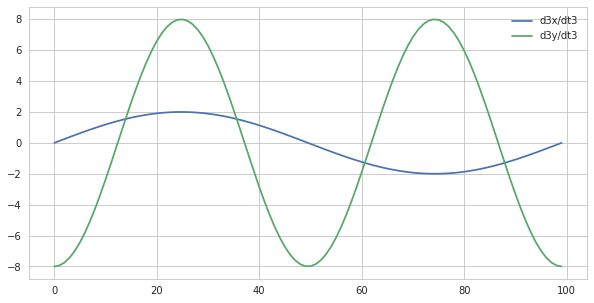

In [53]:
# jerk
d3xdt3 = 2 * np.sin(t)
d3ydt3 = -8 * np.cos(2 * t)

plt.plot(d3xdt3, label='d3x/dt3')
plt.plot(d3ydt3, label='d3y/dt3')
plt.legend()

/opt/conda/lib/python3.6/site-packages/pykalman-0.9.5-py3.6.egg/pykalman/standard.py:1126: RuntimeWarning: covariance is not positive-semidefinite.
  observation_covariance.newbyteorder('=')


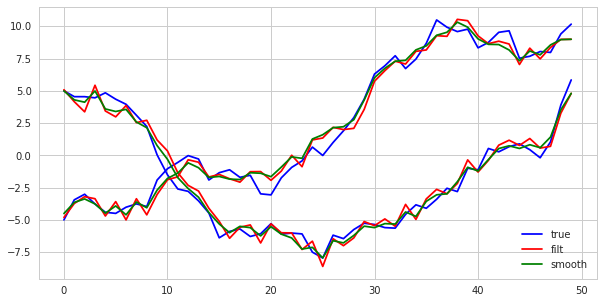

In [6]:
'''
===========================================
Using the Kalman Filter and Kalman Smoother
===========================================
This simple example shows how one may apply the Kalman Filter and Kalman
Smoother to some randomly generated data.
The Kalman Filter and Kalman Smoother are two algorithms for predicting the
hidden state of Linear-Gaussian system. In this script, all model parameters
are specified beforehand, so there is no need to fit the Kalman Filter's
parameters to the measurements. However, this is not essential; sensible
defaults will be used for unspecified parameters, and they may be learned using
:func:`KalmanFilter.em`.
The figure drawn shows the true, hidden state, the state estimates given by the
Kalman Filter, and the state estimates given by the Kalman Smoother.
'''
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

# specify parameters
random_state = np.random.RandomState(0)
transition_matrix = [[1, 0.1], [0, 1]]
transition_offset = [-0.1, 0.1]
observation_matrix = np.eye(2) + random_state.randn(2, 2) * 0.1
observation_offset = [1.0, -1.0]
transition_covariance = np.eye(2)
observation_covariance = np.eye(2) + random_state.randn(2, 2) * 0.1
initial_state_mean = [5, -5]
initial_state_covariance = [[1, 0.1], [-0.1, 1]]

# sample from model
kf = KalmanFilter(
    transition_matrix, observation_matrix, transition_covariance,
    observation_covariance, transition_offset, observation_offset,
    initial_state_mean, initial_state_covariance,
    random_state=random_state
)
states, observations = kf.sample(
    n_timesteps=50,
    initial_state=initial_state_mean
)

# estimate state with filtering and smoothing
filtered_state_estimates = kf.filter(observations)[0]
smoothed_state_estimates = kf.smooth(observations)[0]

# draw estimates
pl.figure()
lines_true = pl.plot(states, color='b')
lines_filt = pl.plot(filtered_state_estimates, color='r')
lines_smooth = pl.plot(smoothed_state_estimates, color='g')
pl.legend((lines_true[0], lines_filt[0], lines_smooth[0]),
          ('true', 'filt', 'smooth'),
          loc='lower right'
)
pl.show()